In [8]:
import os
import sys
import math
import numpy as np
import scanpy as sc
import pandas as pd
import random
import anndata
import seaborn as sns
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from descartes import PolygonPatch
import matplotlib.colors as mcolors
from matplotlib.patches import Patch

import pySTIM as pst

sc.settings.verbosity = 3  

import warnings
warnings.filterwarnings('ignore')
cmap = mcolors.LinearSegmentedColormap.from_list('WhRd',['#ffffff', "#fffacd", "red", "darkred"], N=256)  

In [2]:
adata_xe = sc.read_h5ad("../Xenium_all.h5ad")

In [81]:
genes = ['Nphs2','Ddn','Ehd3', 'Slc5a2', 'Slc5a12', 'Cyp4b1','Slc22a6', 'Slc7a13', 'Acox2', 'Cyp7b1', 'Plin2', "Krt20", 'Havcr1',
         'Vcam1', 'C3', 'Fst', 'Slc12a1', 'Slc12a3', 'Scnn1g',  'Aqp4',"Clnk",
         'Slc26a4', 'Krt19','Krt15', "Akap12", 
         'Emcn', "Col1a1",'Fbln1','Cxcl12', 'Acta2', 'Myh11', 'Cd53','Ccl8','Ccr1']

<Figure size 1920x1440 with 0 Axes>

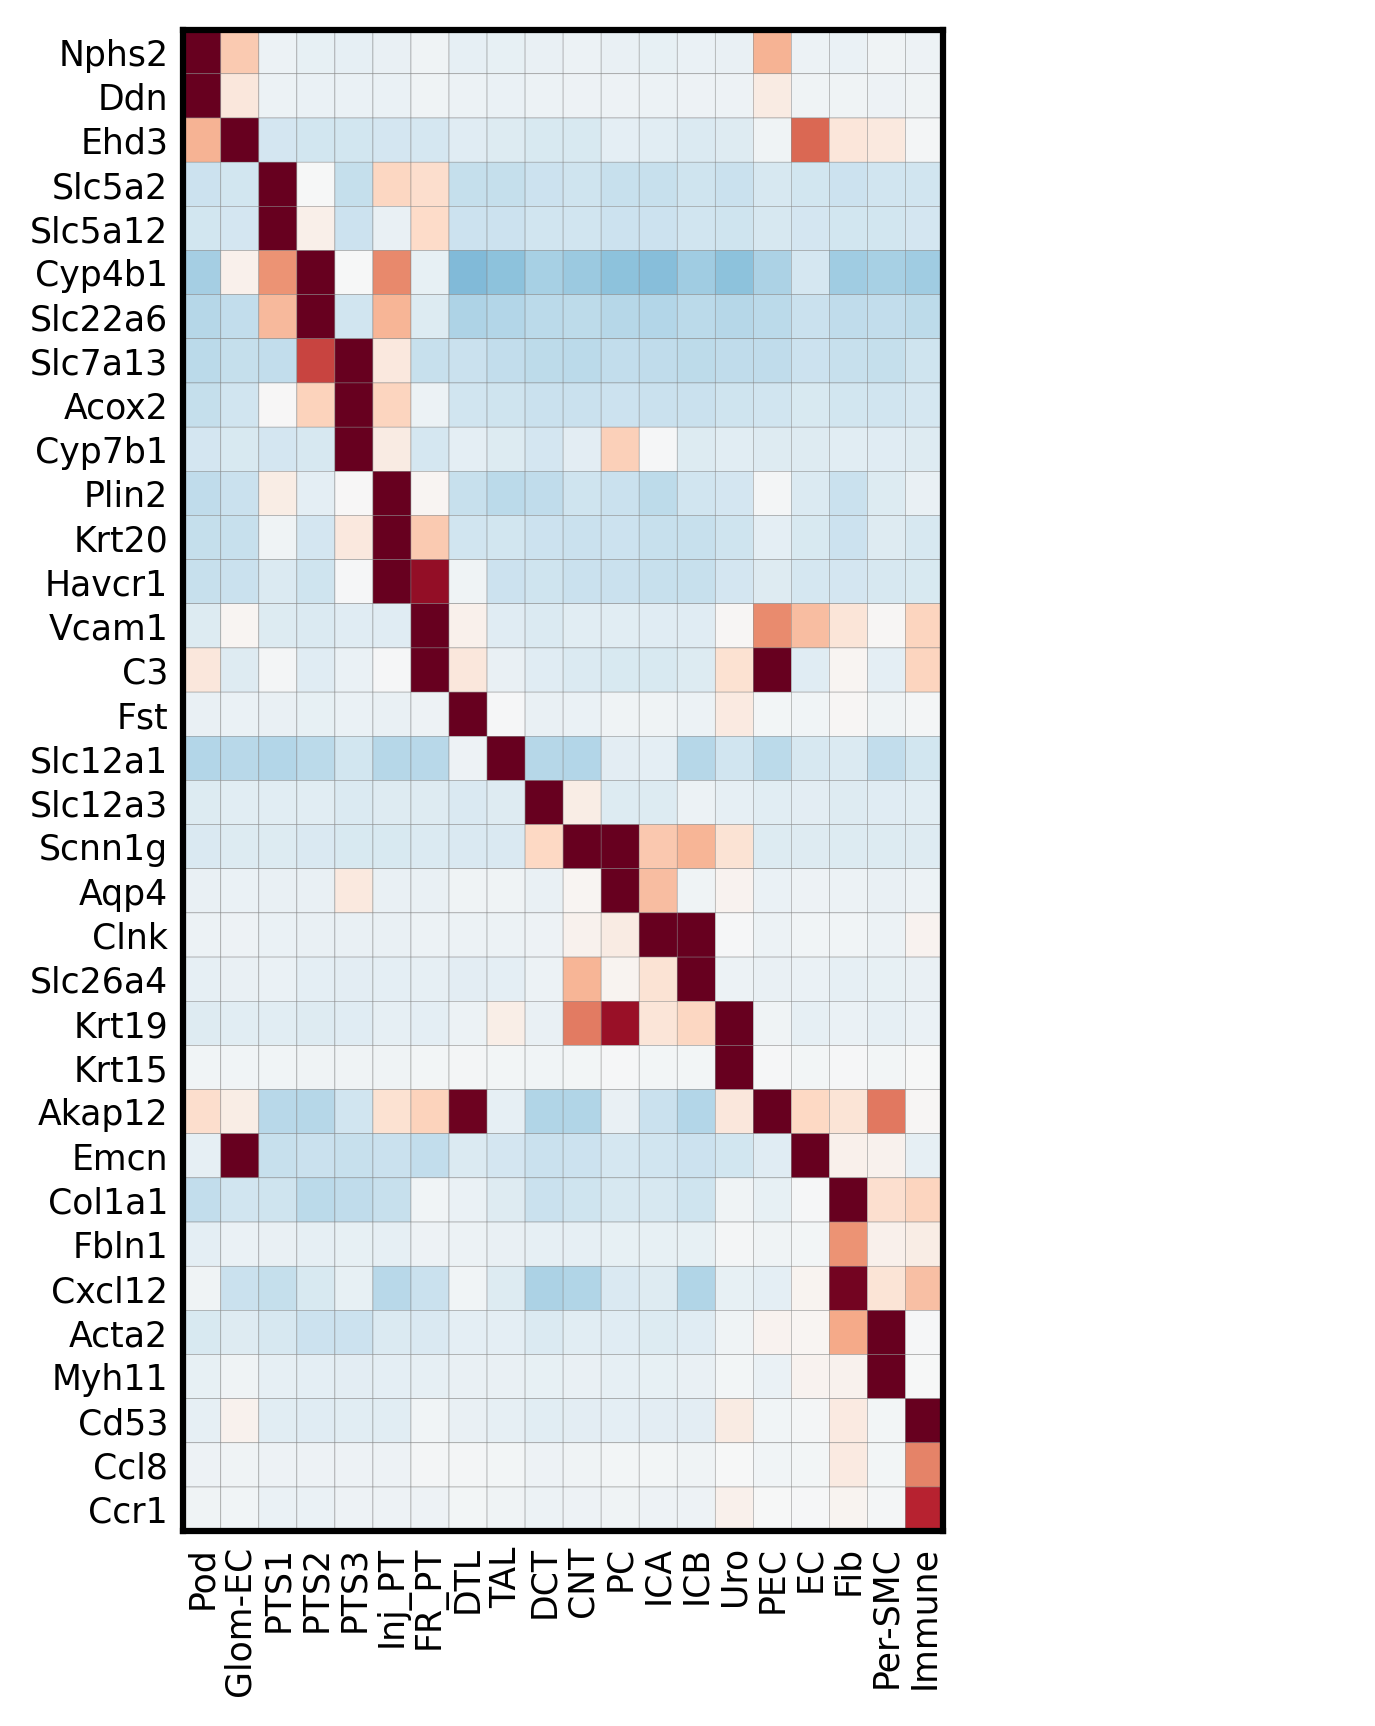

In [82]:
from matplotlib.pyplot import rc_context

with rc_context({'figure.dpi': 300}):
    ax_dict = sc.pl.matrixplot(adata_xe, genes, 'celltype_plot', dendrogram=False, figsize=(5,6.5), layer='scaled', 
                               vmin=-1.5, vmax=1.5, cmap='RdBu_r', swap_axes=True, show=False)
    
    ax_dict['mainplot_ax'].tick_params(axis='both', which='both', length=0)
    ax_dict['color_legend_ax'].set_visible(False)
    plt.show()
    plt.savefig("Xenium_matrixplot.png", transparent=True, bbox_inches="tight")

In [60]:
adata_vis = sc.read_h5ad("../Visium_all.h5ad")
adata_vis.layers["scaled"] = sc.pp.scale(adata_vis, copy=True).X

In [63]:
from matplotlib.pyplot import rc_context

with rc_context({'figure.dpi': 300}):
    ax_dict = sc.pl.matrixplot(adata_vis, genes, 'celltype_xenium', dendrogram=False,figsize=(5,6.5), layer='scaled', 
                               vmin=-1.5, vmax=1.5, cmap='RdBu_r', swap_axes=True, show=False)
    
    ax_dict['mainplot_ax'].tick_params(axis='both', which='both', length=0)
    ax_dict['color_legend_ax'].set_visible(False)
    #plt.show()
    plt.savefig("Visium_matrixplot.png", transparent=True, bbox_inches="tight")